In [1]:
import numpy as np 
import pandas as pd 
import random
from collections import Counter
from typing import Tuple
from typing import List
import sys
from matplotlib import pyplot as plt

In [2]:
class colors():
    
    __slots__ = '__possibilities'
    
    def __init__(self):
        self.__possibilities = ['♠', '♦', '♥', '♣'] #['S','H','D','C'] #no need to ensure type
    
    def getPossibilities(self):
        return self.__possibilities

In [3]:
class numbers():
    
    __slots__ = '__possibilities'
    
    def __init__(self):
        self.__possibilities = ['2','3','4','5','6','7','8','9','J','Q','K','A'] #no need to ensure type
    
    def getPossibilities(self):
        return self.__possibilities

In [46]:
class card():
    __slots__ = '__color', '__number'
    
    def __init__(self,aColor, aNumber):
        if aColor not in colors().getPossibilities() or aNumber not in numbers().getPossibilities():
            raise Exception("wrong color or number")
        self.__color = aColor
        self.__number = aNumber
        
    def getColor(self):
        return self.__color
    
    def getNumber(self):
        return self.__number
    
    def visualize(self):
        print(self.__color+self.__number)

In [47]:
class hand():
    __slots__ = '__cards', '__size', '__numbersOnly', '__colorsOnly'
    
    def __init__(self):
        self.__size = 0
        self.__cards = []
        self.__numbersOnly = []
        self.__colorsOnly = []
        
    def addCard(self, aCard:card):
        self.__cards.append(aCard)
        self.__numbersOnly.append(aCard.getNumber())
        self.__colorsOnly.append(aCard.getColor())
        self.__size = self.__size + 1
        
    def getCards(self):
        return self.__cards
    
    def getNumbers(self):
        return self.__numbersOnly
    
    def getColors(self):
        return self.__colorsOnly
    
    def visualizeHand(self):
        myVisu = []
        for card in self.__cards:
            myVisu.append(card.getNumber() + card.getColor())
        print(myVisu)
            

        

In [118]:
class deck():
    __slots__ = '__cards'
        
    def __init__(self):
        self.__cards = []
        for color in colors().getPossibilities():
            for number in numbers().getPossibilities():
                self.__cards.append(card(color, number))
        random.shuffle(self.__cards)
    
    def drawCard(self,card_=None):
        if card_:
            #card_.visualize()
            # self.__cards.remove(card_) // class object type : it won't be recognized as in the list
            for idx,card in enumerate(self.__cards):
                if card.getColor() == card_.getColor() and card.getNumber() == card_.getNumber():
                    self.__cards.pop(idx)
                    break
            myCardToReturn = card_
        else:
            myCardToReturn = self.__cards.pop(0)
        return myCardToReturn
    
    def getDeck(self):
        return self.__cards

In [119]:
class river():
    __slots__ = '__cards', '__size', '__numbersOnly', '__colorsOnly'
    
    def __init__(self):
        self.__size = 0
        self.__cards = []
        self.__numbersOnly = []
        self.__colorsOnly = []
        
    def addCard(self, aCard:card):
        self.__cards.append(aCard)
        self.__numbersOnly.append(aCard.getNumber())
        self.__colorsOnly.append(aCard.getColor())
        self.__size = self.__size + 1
        
    def getCards(self):
        return self.__cards
    
    def getNumbers(self):
        return self.__numbersOnly
    
    def getColors(self):
        return self.__colorsOnly
    
    def visualizeHand(self):
        myVisu = []
        for card in self.__cards:
            myVisu.append(card.getNumber() + card.getColor())
        print(myVisu)
            


In [120]:
def isFlush(aHand:hand) -> bool:
    return max(Counter(aHand.getColors()).values()) >= 5

def isStraight(aHand:hand) -> Tuple[bool, int]:
    first = True
    countConseq = 0
    maxConSeq = 0
    lastCardSeq = 0
    myIndexedSortedHand = sorted([numbers().getPossibilities().index(x) for x in aHand.getNumbers()])
    for idx in myIndexedSortedHand:
        if not first:
            if idx == myLastIdx+1:
                countConseq = countConseq+1
                lastCardSeq = myLastIdx #to compare between straights
            else:
                countConseq = 0
            if countConseq > maxConSeq :
                maxConSeq = countConseq
        first = False
        myLastIdx = idx
    
    return maxConSeq>=5,int(lastCardSeq)
    
    
def howManySameNumber(aHand:hand)-> Tuple[List,List,List]:
    myCount = Counter(aHand.getNumbers())
    
#     nbFourOfAKind = Counter(myCount.values())[4] #how many four of a kind ..
    cards4 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 4]]
#     nbThreeOfAKind = Counter(myCount.values())[3]
    cards3 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 3]]
#     nbPair = Counter(myCount.values())[2]
    cards2 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 2]]
    
    return cards2,cards3,cards4
    
def singleCard(aHand:hand, idxBest=1): #idxBest starts at 1 for best, 2 for snd Best
    
    return sorted([numbers().getPossibilities().index(x) for x in aHand.getNumbers()])[-idxBest] #get number with highest

In [121]:
def getValue(aHand:hand) -> float:
    myValue = 0
    myStraight, myidx = isStraight(aHand)
    myFlush = isFlush(aHand)
    myRoyal = myidx is len(numbers().getPossibilities())-1
    
    myPairs, myThrees, myFour = howManySameNumber(aHand) 
    
    myValue = myValue + myStraight*myFlush*myRoyal*200200000000 + myStraight*myFlush*10200000000*myidx
   
    if len(myFour):
        myFourValue = 560000000*myFour[0]
    else:
        myFourValue = 0
    
    if len(myThrees)==2 or (len(myThrees)==1 and len(myPairs)):
        myFullHouse= 28000000 * max(myThrees)
    else:
        myFullHouse = 0
    
    
    if len(myPairs)==2:
        myTwoPairs = 70000 * sorted(myPairs)[1]+4000 * sorted(myPairs)[0]
    else:
        myTwoPairs = 0
    
    if len(myThrees)==1:
        myThreeCard = 1400000 * max(myThrees)
    else:
        myThreeCard = 0
        
    if len(myPairs)==1:
        myOnePair = 200 * max(myPairs)
    else:
        myOnePair = 0
    
    myValue = myValue + myFourValue + myFullHouse + 40000*myFlush + 2000*myStraight*myidx
    myValue = myValue + myThreeCard + myTwoPairs + myOnePair 
    
    initCoef = 10
    for i in range(0,7):
        myValue = myValue + singleCard(aHand,i+1)*initCoef
        initCoef = initCoef/20
    
    return myValue
    

In [122]:
# a = ['K', 'J', 'A','A'] 
# possibilities = ['2','3','4','5','6','7','8','9','J','Q','K','A']

# sorted(np.unique(a), key=lambda x: possibilities.index(x))

In [123]:
# nbPlayers = 20
# myDeck = deck()
# mySmallHands = [] #individualHand
# myBigHands = [] #Hand with River
# for i in range(0,nbPlayers):
#     mySmallHands.append(hand())
#     myBigHands.append(hand())
# myRiver = river()

In [124]:

# #draw cards
# for drawnCard in range(0,2):
#     for player in range(0,nbPlayers):
#         myCard = myDeck.drawCard()
#         mySmallHands[player].addCard(myCard)
#         myBigHands[player].addCard(myCard)
        
# #draw cards in the river
# for drawnCard in range(0,5):
#     myCard = myDeck.drawCard()
    
#     myRiver.addCard(myCard)
#     for player in range(0,nbPlayers):
#         myBigHands[player].addCard(myCard)

In [125]:
# for i in range(0,nbPlayers):
#     print(getValue(myBigHands[i]))

In [126]:
# for i in range(0,nbPlayers):
#     print(myBigHands[i].visualizeHand())

In [134]:
class game():
    
    __slots__ = "nbPlayers", "deck", "smallHands", "bigHands", "river", "judgerEnabler", 'winner', 'forcedCards'
    
    def __init__(self, nbOfPlayer_ : int, forcedCards_:bool = False):
        self.judgerEnabler = 0
        self.nbPlayers = nbOfPlayer_
        self.deck = deck()
        self.smallHands = [] #individualHand
        self.bigHands = [] #Hand with River
        self.forcedCards = forcedCards_
        
        for i in range(0,self.nbPlayers):
            self.smallHands.append(hand())
            self.bigHands.append(hand())
            
        self.river = river()
        self.winner = None
        
        
    def dealCards(self,*kwargs) -> "Nothing":
        if self.forcedCards and len(kwargs)!=2:
            raise Exception("You need to add 2 cards as argument")
        else:
        #draw cards
            if self.judgerEnabler == 0:
                for player in range(0,self.nbPlayers):
                    for drawnCard in range(0,2):
                        if self.forcedCards and player==0:
                            #print(kwargs[drawnCard])
                            myCard = self.deck.drawCard(kwargs[drawnCard])
                        else:
                            myCard = self.deck.drawCard()
                            
                        self.smallHands[player].addCard(myCard)
                        self.bigHands[player].addCard(myCard)
            else:
                raise Exception("Already dealt cards to players")
            self.judgerEnabler = 1
                
    def dealFlop(self) -> "Nothing":
        if self.judgerEnabler == 1:
            for drawnCard in range(0,3):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler > 1:
            raise Exception("Already did the flop")
        self.judgerEnabler = 2
            
    def dealTurn(self) -> "Nothing":
        if self.judgerEnabler == 2:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler > 2:
            raise Exception("Already did the Turn, it is now time for the River")
        self.judgerEnabler = 3
        
    def dealRiver(self) -> "Nothing":
        if self.judgerEnabler == 3:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
            self._judgeTheGame()
            
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler == 2:
            raise Exception("Turn has not been done, please do things in order")
        elif self.judgerEnabler > 3:
            raise Exception("the Game is Over")
        self.judgerEnabler = 4
        
    def _judgeTheGame(self):
        myValues = []
        for i in range(0,self.nbPlayers):
            myValues.append(getValue(self.bigHands[i]))
        self.winner = myValues.index(max(myValues))
        
    def getWinner(self):
        return self.winner

In [135]:
myWinners = []

myNbOfSim = 100
myForcedCards = True
myNbOfPlayer = 3

if myForcedCards:
    print("Your are player 0!")
   
myCard1 = card('♦','K')
myCard2 = card('♥','K')

for i in range(0,myNbOfSim):
    
    myGame = game(nbOfPlayer_=myNbOfPlayer, forcedCards_ = myForcedCards)
    myGame.dealCards(myCard1, myCard2)
    myGame.dealFlop()
    myGame.dealTurn()
    myGame.dealRiver()
    myWinners.append(myGame.getWinner())
    
    
    

Your are player 0!


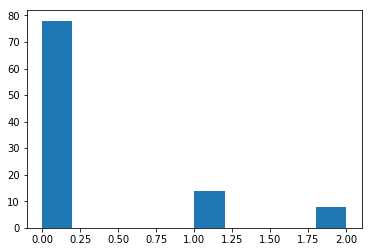

In [136]:
plt.hist(myWinners)
plt.show()

In [ ]:
#todo fix the game: I should be winning far more
